In [ ]:
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
eji = pd.read_csv('data/EJI_2024_California_CSV/EJI_2024_California.csv')
eaton = gpd.read_file('data/Eaton_Perimeter_20250121/Eaton_Perimeter_20250121.shp')
palisades = gpd.read_file('data/Palisades_Perimeter_20250121/Palisades_Perimeter_20250121.shp')
census_tracts = gpd.read_file('data/tl_2021_06_tract/tl_2021_06_tract.shp')

In [3]:
eaton_tracts = census_tracts[census_tracts.intersects(eaton.to_crs(census_tracts.crs).unary_union)].copy()

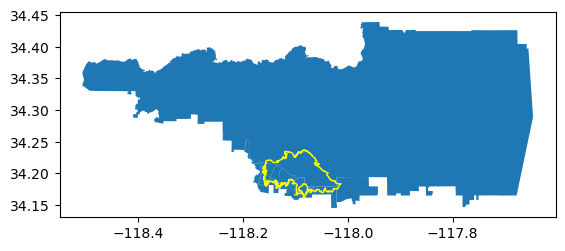

In [4]:
fig, ax = plt.subplots()
eaton_tracts.plot(ax=ax)
eaton.to_crs(census_tracts.crs).plot(ax=ax, color='none', edgecolor='yellow')

plt.show()

In [5]:
palisades_tracts = census_tracts[census_tracts.intersects(palisades.to_crs(census_tracts.crs).unary_union)].copy()

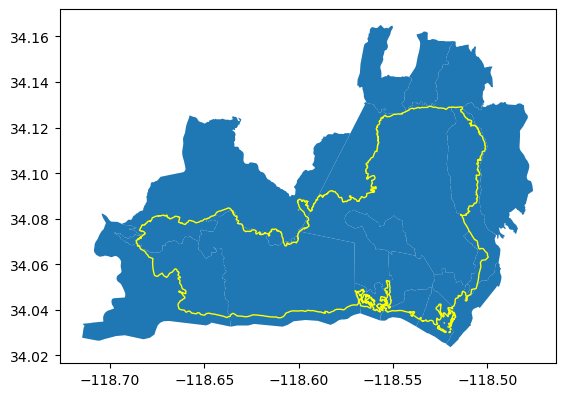

In [6]:
fig, ax = plt.subplots()
palisades_tracts.plot(ax=ax)
palisades.to_crs(census_tracts.crs).plot(ax=ax, color='none', edgecolor='yellow')

plt.show()

In [7]:
palisades_tracts['TRACTCE'] = palisades_tracts['TRACTCE'].astype('int64')
palisades_tracts = pd.merge(palisades_tracts,
                            eji,
                            how='left',
                            on='TRACTCE')

eaton_tracts['TRACTCE'] = eaton_tracts['TRACTCE'].astype('int64')
eaton_tracts = pd.merge(eaton_tracts,
                            eji,
                            how='left',
                            on='TRACTCE')

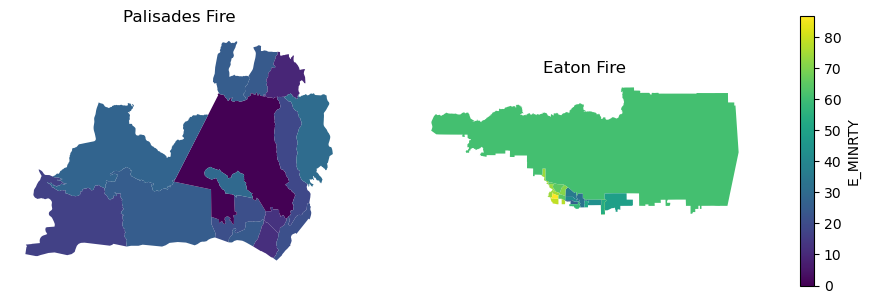

In [13]:
variable = 'E_MINRTY'

# 1. Compute shared min/max across both datasets
vmin = min(palisades_tracts[variable].min(),
           eaton_tracts[variable].min())

vmax = max(palisades_tracts[variable].max(),
           eaton_tracts[variable].max())

# 2. Create a shared norm + colormap
cmap = "viridis"
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)

# 3. Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

palisades_tracts.plot(ax=ax1, column=variable, cmap=cmap, norm=norm)
ax1.set_title("Palisades Fire")
ax1.axis("off")

eaton_tracts.plot(ax=ax2, column=variable, cmap=cmap, norm=norm)
ax2.set_title("Eaton Fire")
ax2.axis("off")

# 4. Add a single shared colorbar
sm = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])  # required for matplotlib < 3.6
cbar = fig.colorbar(sm, ax=[ax1, ax2], shrink=0.7)
cbar.set_label(variable)

plt.show()


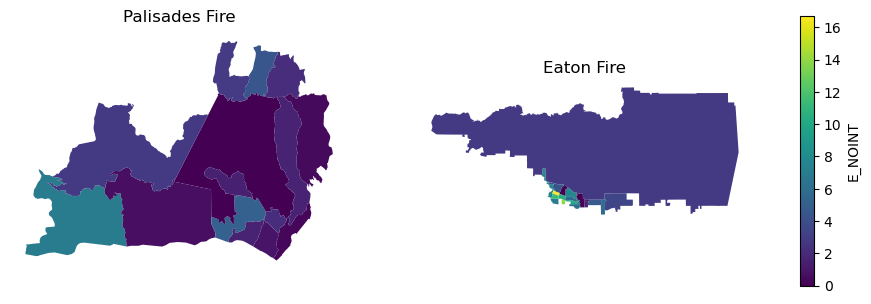

In [ ]:
# 1. Compute shared min/max across both datasets
vmin = min(palisades_tracts["E_NOINT"].min(),
           eaton_tracts["E_NOINT"].min())

vmax = max(palisades_tracts["E_NOINT"].max(),
           eaton_tracts["E_NOINT"].max())

# 2. Create a shared norm + colormap
cmap = "viridis"
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)

# 3. Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

palisades_tracts.plot(ax=ax1, column='E_NOINT', cmap=cmap, norm=norm)
ax1.set_title("Palisades Fire")
ax1.axis("off")

eaton_tracts.plot(ax=ax2, column='E_NOINT', cmap=cmap, norm=norm)
ax2.set_title("Eaton Fire")
ax2.axis("off")

# 4. Add a single shared colorbar
sm = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])  # required for matplotlib < 3.6
cbar = fig.colorbar(sm, ax=[ax1, ax2], shrink=0.7)
cbar.set_label("E_NOINT")

plt.show()


Ideas:

1. Students select one variable that can affect the environmental impact across the different census tracts. 
2. For that same variable, they compute the percentage of the total population in the affected census tracts that satisfy that variable and create a plot. 

In [ ]:
palisades_tracts[['E_NOINT', 'E_TOTPOP']]


,E_NOINT,E_TOTPOP
0,4.5,2438
1,1.6,3590
2,6.9,1890
3,0.6,3393
4,0.9,3492
5,5.1,5763
6,0.3,3512
7,0.0,79
8,2.8,3665
9,2.1,2597


In [ ]:
total_pop_palisades = palisades_tracts['E_TOTPOP'].sum()
total_pop_palisades

47051

In [ ]:
# Percentage of the population in the census tracts that intersect the fire perimenter without internet access
(palisades_tracts['E_NOINT']*palisades_tracts['E_TOTPOP']/100).sum() / total_pop_palisades * 100

2.3651930883509387

In [19]:
total_pop_eaton = eaton_tracts['E_TOTPOP'].sum()
total_pop_eaton

81681

In [ ]:
# Percentage of the population in the census tracts that intersect the fire perimenter without internet access
(eaton_tracts['E_NOINT']*eaton_tracts['E_TOTPOP']/100).sum() / total_pop_eaton * 100

7.016213072807628